In [1]:
import warnings

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

from get_data import get_balanced_exoplanet_data, get_scaled_balanced_exoplanet_data

warnings.simplefilter("ignore")

In [2]:
x_train, x_test, y_train, y_test = get_balanced_exoplanet_data()
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = get_scaled_balanced_exoplanet_data()

## Try without scaling

0.9396039603960396


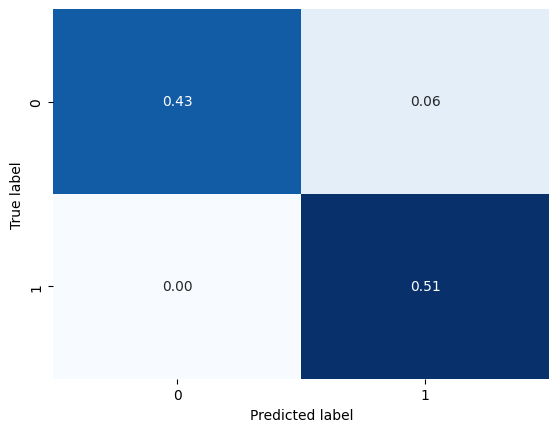

In [3]:
# Parameters
rng_seed = 2023
depth = 5  # max tree depth
cmap = "Blues"
fmt = ".2f"

model = DecisionTreeClassifier(
    max_depth=depth,
    random_state=rng_seed,
    class_weight="balanced",
)
model.fit(x_train, y_train)
pred = model.predict(x_test)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test, pred, normalize="all"),
    annot=True,
    cmap=cmap,
    cbar=False,
    fmt=fmt,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Metrics
print(accuracy_score(y_test, pred))

## Test if scaling improves performance

0.9386138613861386


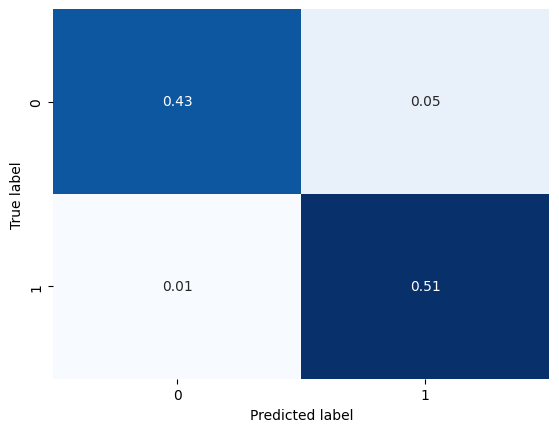

In [4]:
model = DecisionTreeClassifier(
    max_depth=depth,
    random_state=rng_seed,
    class_weight="balanced",
)
model.fit(x_train_scaled, y_train_scaled)
pred = model.predict(x_test_scaled)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test_scaled, pred, normalize="all"),
    annot=True,
    cmap=cmap,
    cbar=False,
    fmt=fmt,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Metrics
print(accuracy_score(y_test_scaled, pred))

#### Here scaling does not really improve performance

## Test other criterion

0.9341584158415842
0.9341584158415842


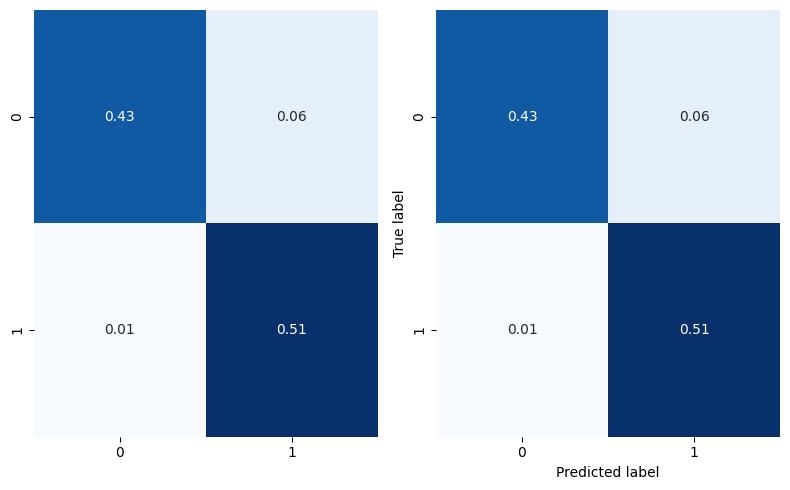

In [5]:
# Parameters
criterion = "entropy"  # entropy/log_loss are the same

fig, axs = plt.subplots(1, 2, figsize=(8, 5))

model = DecisionTreeClassifier(
    max_depth=depth,
    random_state=rng_seed,
    class_weight="balanced",
    criterion=criterion,
)
model.fit(x_train, y_train)
pred = model.predict(x_test)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test, pred, normalize="all"),
    annot=True,
    cmap=cmap,
    cbar=False,
    fmt=fmt,
    ax=axs[i],
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Metrics
print(accuracy_score(y_test, pred))

plt.tight_layout()
plt.show();

#### It seems the gini index performs slightly better

## Plot precision as function of max tree depth

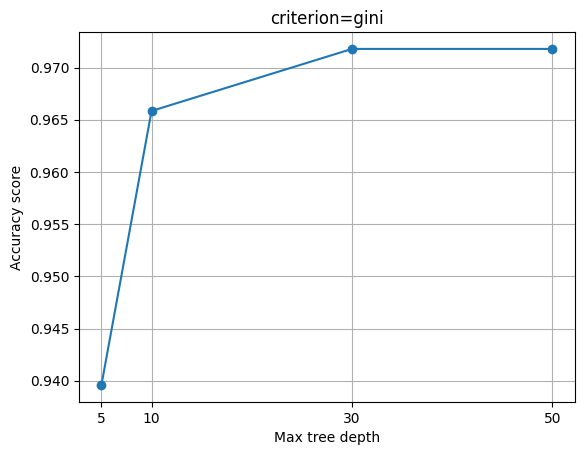

In [7]:
# Parameters
depths = [5, 10, 30, 50]
filename = "../results/figures/class_tree_asfuncof_depth.png"

accuracies = np.empty(len(depths))
models = list()
for i, depthi in enumerate(depths):
    modeli = DecisionTreeClassifier(
        max_depth=depthi, random_state=rng_seed, class_weight="balanced"
    )
    modeli.fit(x_train, y_train)
    predi = modeli.predict(x_test)
    models.append(modeli)
    accuracies[i] = accuracy_score(y_test, predi)

plt.plot(depths, accuracies, "-o")
plt.xlabel("Max tree depth")
plt.ylabel("Accuracy score")
plt.xticks(depths)
plt.grid(True)
plt.title("criterion=gini")
plt.savefig(filename)
plt.show()

# Plot final result with optimal parameter

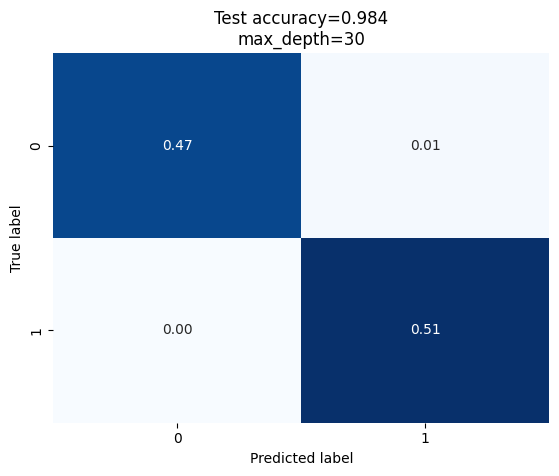

In [6]:
# Parameters
depth = 30  # max tree depth
filename = "../results/figures/class_tree_conf_matrix.png"


model = DecisionTreeClassifier(
    max_depth=depth,
    random_state=rng_seed,
    class_weight="balanced",
)
model.fit(x_train_scaled, y_train_scaled)
pred = model.predict(x_test_scaled)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test_scaled, pred, normalize="all"),
    annot=True,
    cmap=cmap,
    cbar=False,
    fmt=fmt,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.title(
    f"Test accuracy={accuracy_score(y_test_scaled, pred):.3f}\n" + f"max_depth={depth}"
)
plt.savefig(filename)
plt.show();